# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Load & Preview Dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Split Dataset as Training Dataset

* `Annual Income (k$)` & `Spending Score (1-100)` are splitted as training dataset

In [6]:
X = dataset.iloc[:, [3, 4]].values

In [7]:
X.shape

(200, 2)

In [10]:
print( X[0:5] )

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


# Use dendrogram to find the optimal number of clusters

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])


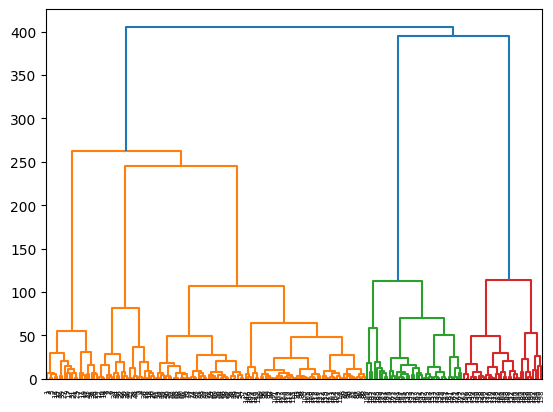

In [73]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
print( dendrogram.keys() );

In [25]:
print( 'icoord:', len(dendrogram['icoord']) )
print( 'dcoord:', len(dendrogram['dcoord']) )
print( 'color_list:', len(dendrogram['color_list']) )
print( 'ivl:', len(dendrogram['ivl']) )
print( 'leaves:', len(dendrogram['leaves']) )
print( 'leaves_color_list:', len(dendrogram['leaves_color_list']) )

icoord: 199
dcoord: 199
color_list: 199
ivl: 200
leaves: 200
leaves_color_list: 200


In [26]:
dendrogram['icoord'][0:10]

[[15.0, 15.0, 25.0, 25.0],
 [35.0, 35.0, 45.0, 45.0],
 [20.0, 20.0, 40.0, 40.0],
 [5.0, 5.0, 30.0, 30.0],
 [55.0, 55.0, 65.0, 65.0],
 [85.0, 85.0, 95.0, 95.0],
 [115.0, 115.0, 125.0, 125.0],
 [105.0, 105.0, 120.0, 120.0],
 [90.0, 90.0, 112.5, 112.5],
 [75.0, 75.0, 101.25, 101.25]]

In [29]:
dendrogram['dcoord'][0:10]

[[0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
 [0.0, 2.0, 2.0, 0.0],
 [1.4142135623730951, 5.385164807134504, 5.385164807134504, 2.0],
 [0.0, 6.276941930590087, 6.276941930590087, 5.385164807134504],
 [0.0, 3.605551275463989, 3.605551275463989, 0.0],
 [0.0, 6.324555320336759, 6.324555320336759, 0.0],
 [0.0, 1.0, 1.0, 0.0],
 [0.0, 6.350852961085883, 6.350852961085883, 1.0],
 [6.324555320336759,
  11.604596790352806,
  11.604596790352806,
  6.350852961085883],
 [0.0, 14.479871085982314, 14.479871085982314, 11.604596790352806]]

In [30]:
dendrogram['color_list'][0:10]

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']

In [36]:
set(dendrogram['color_list'])

{'C0', 'C1', 'C2', 'C3'}

In [31]:
dendrogram['ivl'][0:10]

['1', '3', '5', '13', '15', '37', '39', '27', '9', '17']

In [32]:
dendrogram['leaves'][0:10]

[1, 3, 5, 13, 15, 37, 39, 27, 9, 17]

In [33]:
dendrogram['leaves_color_list'][0:10]

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']

In [37]:
set(dendrogram['leaves_color_list'])

{'C1', 'C2', 'C3'}

In [71]:
# list(dendrogram.items())

In [64]:
df_dendogram = pd.DataFrame(list(zip(dendrogram['icoord'],dendrogram['dcoord'],dendrogram['color_list'],dendrogram['ivl'],dendrogram['leaves'],dendrogram['leaves_color_list'])), columns=['icoord', 'dcoord', 'color_list', 'ivl', 'leaves', 'leaves_color_list'])

In [65]:
df_dendogram.shape

(199, 6)

In [96]:
df_dendogram.head()

,icoord,dcoord,color_list,ivl,leaves,leaves_color_list
0,"[15.0, 15.0, 25.0, 25.0]","[0.0, 1.4142135623730951, 1.4142135623730951, ...",C1,1,1,C1
1,"[35.0, 35.0, 45.0, 45.0]","[0.0, 2.0, 2.0, 0.0]",C1,3,3,C1
2,"[20.0, 20.0, 40.0, 40.0]","[1.4142135623730951, 5.385164807134504, 5.3851...",C1,5,5,C1
3,"[5.0, 5.0, 30.0, 30.0]","[0.0, 6.276941930590087, 6.276941930590087, 5....",C1,13,13,C1
4,"[55.0, 55.0, 65.0, 65.0]","[0.0, 3.605551275463989, 3.605551275463989, 0.0]",C1,15,15,C1


In [72]:
df_dendogram.to_csv('dendogram.csv')

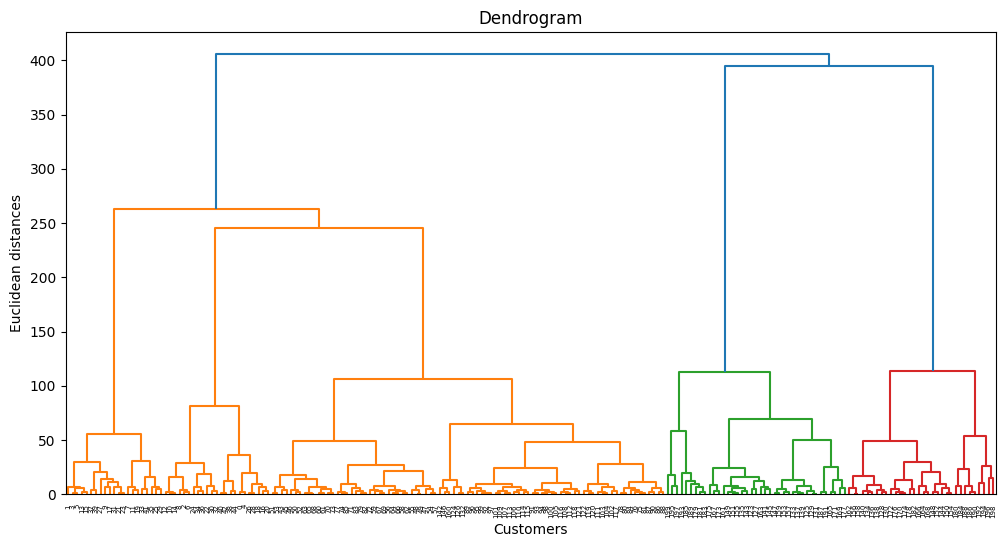

In [81]:
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fit Hierarchical Clustering Model with Training Dataset

In [83]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [84]:
y_hc.shape

(200,)

In [85]:
print( y_hc )

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


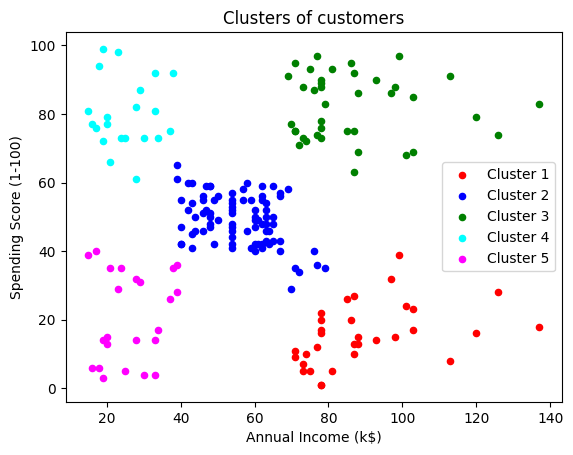

In [89]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()